In [42]:
import networkx as nx
import pandas as pd
import jieba
import wordcloud
import matplotlib.pyplot as plt
from collections import Counter
# 设置中文字体
import seaborn as sns
from snownlp import SnowNLP
from tqdm import tqdm
plt.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
data = pd.read_csv(r'D:\pycharmproject\taobao_comments.csv')
data.head()

,username,time,content
0,城**q,2025年2月5日 · 10ml*30支/盒 x 2盒 【推荐购买】滋补亏空,包装严实，没有破损，喝了一瓶，味道还可以，好评先！
1,忆**天,2024年12月21日 · 10ml*30支/盒 x 1盒 【1疗程】改善失眠-送礼爆款,平时我都不喜欢评价，但是这款产品真的很有效果，我已经回购的第三次了，以前总是睡不着，晚上睡觉...
2,城**q,2025年2月5日 · 10ml*30支/盒 x 2盒 【推荐购买】滋补亏空,包装严实，没有破损，喝了一瓶，味道还可以，好评先！
3,忆**天,2024年12月21日 · 10ml*30支/盒 x 1盒 【1疗程】改善失眠-送礼爆款,平时我都不喜欢评价，但是这款产品真的很有效果，我已经回购的第三次了，以前总是睡不着，晚上睡觉...
4,t**6,2025年2月8日 · 10支 x 3盒 【自用无礼袋】固肾安神,味道没那么苦，微甜，每天喝起来很方便，坚持了一个月感觉有效果，睡眠和精神都有改善


In [3]:
data[['time1', 'buy_style']] = data['time'].str.split('·', expand=True)
data

,username,time,content,time1,buy_style
0,城**q,2025年2月5日 · 10ml*30支/盒 x 2盒 【推荐购买】滋补亏空,包装严实，没有破损，喝了一瓶，味道还可以，好评先！,2025年2月5日,10ml*30支/盒 x 2盒 【推荐购买】滋补亏空
1,忆**天,2024年12月21日 · 10ml*30支/盒 x 1盒 【1疗程】改善失眠-送礼爆款,平时我都不喜欢评价，但是这款产品真的很有效果，我已经回购的第三次了，以前总是睡不着，晚上睡觉...,2024年12月21日,10ml*30支/盒 x 1盒 【1疗程】改善失眠-送礼爆款
2,城**q,2025年2月5日 · 10ml*30支/盒 x 2盒 【推荐购买】滋补亏空,包装严实，没有破损，喝了一瓶，味道还可以，好评先！,2025年2月5日,10ml*30支/盒 x 2盒 【推荐购买】滋补亏空
3,忆**天,2024年12月21日 · 10ml*30支/盒 x 1盒 【1疗程】改善失眠-送礼爆款,平时我都不喜欢评价，但是这款产品真的很有效果，我已经回购的第三次了，以前总是睡不着，晚上睡觉...,2024年12月21日,10ml*30支/盒 x 1盒 【1疗程】改善失眠-送礼爆款
4,t**6,2025年2月8日 · 10支 x 3盒 【自用无礼袋】固肾安神,味道没那么苦，微甜，每天喝起来很方便，坚持了一个月感觉有效果，睡眠和精神都有改善,2025年2月8日,10支 x 3盒 【自用无礼袋】固肾安神
...,...,...,...,...,...
15693,白**5,2024年12月15日 ·,此用户没有填写评价。,2024年12月15日,
15694,白**5,2024年12月15日 ·,此用户没有填写评价。,2024年12月15日,
15695,八**坡,2024年8月21日 ·,此用户没有填写评价。,2024年8月21日,
15696,创**1,2024年12月15日 ·,此用户没有填写评价。,2024年12月15日,


In [4]:
data.drop('time', axis=1, inplace=True)
data

,username,content,time1,buy_style
0,城**q,包装严实，没有破损，喝了一瓶，味道还可以，好评先！,2025年2月5日,10ml*30支/盒 x 2盒 【推荐购买】滋补亏空
1,忆**天,平时我都不喜欢评价，但是这款产品真的很有效果，我已经回购的第三次了，以前总是睡不着，晚上睡觉...,2024年12月21日,10ml*30支/盒 x 1盒 【1疗程】改善失眠-送礼爆款
2,城**q,包装严实，没有破损，喝了一瓶，味道还可以，好评先！,2025年2月5日,10ml*30支/盒 x 2盒 【推荐购买】滋补亏空
3,忆**天,平时我都不喜欢评价，但是这款产品真的很有效果，我已经回购的第三次了，以前总是睡不着，晚上睡觉...,2024年12月21日,10ml*30支/盒 x 1盒 【1疗程】改善失眠-送礼爆款
4,t**6,味道没那么苦，微甜，每天喝起来很方便，坚持了一个月感觉有效果，睡眠和精神都有改善,2025年2月8日,10支 x 3盒 【自用无礼袋】固肾安神
...,...,...,...,...
15693,白**5,此用户没有填写评价。,2024年12月15日,
15694,白**5,此用户没有填写评价。,2024年12月15日,
15695,八**坡,此用户没有填写评价。,2024年8月21日,
15696,创**1,此用户没有填写评价。,2024年12月15日,


# 数据预处理

In [5]:
print(f"原始数据量：{len(data)}")

# 过滤无意义评价
invalid_texts = ['此用户没有填写评价。', "评价方未及时做出评价,系统默认好评!", '系统默认好评']
data = data[~data['content'].isin(invalid_texts)]

# 删除空值
data = data.dropna(subset=['content'])

# 2.去除空白内容
data = data[data['content'].str.strip().astype(bool)]

# 3.去除过短的内容
data = data[data['content'].str.len() > 8]

# 4.意思水军
# 标记疑似水军账号（发布超过5条相同内容）
spam_users = data.groupby(['username', 'content']).filter(lambda x: len(x) > 5)['username'].unique()
data = data[~data['username'].isin(spam_users)]

print(f"清洗后数据量：{len(data)}")

原始数据量：15698
清洗后数据量：7517


In [6]:
data

,username,content,time1,buy_style
0,城**q,包装严实，没有破损，喝了一瓶，味道还可以，好评先！,2025年2月5日,10ml*30支/盒 x 2盒 【推荐购买】滋补亏空
1,忆**天,平时我都不喜欢评价，但是这款产品真的很有效果，我已经回购的第三次了，以前总是睡不着，晚上睡觉...,2024年12月21日,10ml*30支/盒 x 1盒 【1疗程】改善失眠-送礼爆款
2,城**q,包装严实，没有破损，喝了一瓶，味道还可以，好评先！,2025年2月5日,10ml*30支/盒 x 2盒 【推荐购买】滋补亏空
3,忆**天,平时我都不喜欢评价，但是这款产品真的很有效果，我已经回购的第三次了，以前总是睡不着，晚上睡觉...,2024年12月21日,10ml*30支/盒 x 1盒 【1疗程】改善失眠-送礼爆款
4,t**6,味道没那么苦，微甜，每天喝起来很方便，坚持了一个月感觉有效果，睡眠和精神都有改善,2025年2月8日,10支 x 3盒 【自用无礼袋】固肾安神
...,...,...,...,...
15687,t**6,发货迅速，物流很快，包装严实，正品，使用效果很好,2024年5月7日,黄金搭配【如图】
15688,白**5,买好几次了 挺好用的,2024年10月20日,
15689,z**7,注意看是十二片，一盒十二片。,2024年10月15日,
15690,白**5,买好几次了 挺好用的,2024年10月20日,


In [50]:
custom_dict_path = 'sleep.txt' # 自定义词典
stopwords_path = '停用词.txt'  
font_path = 'C:/Windows/Fonts/simhei.ttf'
# 加载自定义词典
jieba.load_userdict(custom_dict_path)
# 加载停用词表
with open(stopwords_path, 'r', encoding='utf-8') as f:
    stopwords = set(line.strip() for line in f)
    
def tokenize(text):
    words = jieba.lcut(text)
    return [word.strip() for word in words 
            if word.strip() 
            and word not in stopwords 
            and len(word) > 1  # 过滤单字
            and not word.isdigit()]  # 过滤纯数字
# 应用分词
data['tokens'] = data['content'].apply(tokenize)
# 生成词频
all_words = [word for tokens in data['tokens'] for word in tokens]
word_freq = Counter(all_words)

In [51]:
print(type(word_freq))

<class 'collections.Counter'>


In [52]:
wc = wordcloud.WordCloud(
    font_path=font_path,
    width=1200, 
    height=800,
    background_color='white',
    max_words=200,
    collocations=False,# 禁用词组
    scale=3 
)
word_cloud = wc.generate_from_frequencies(word_freq)

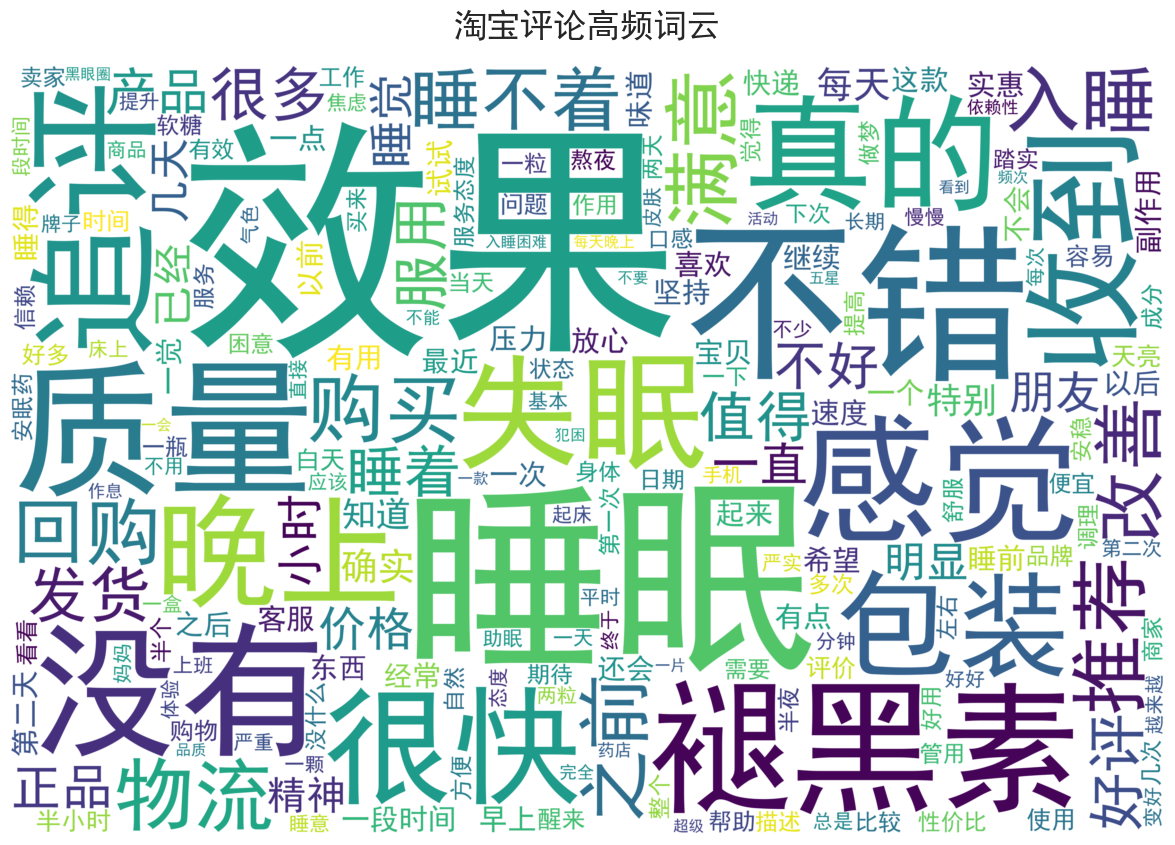

In [53]:
plt.figure(figsize=(15, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("淘宝评论高频词云", fontsize=24, pad=20)
plt.savefig('词云图.png')
plt.show()

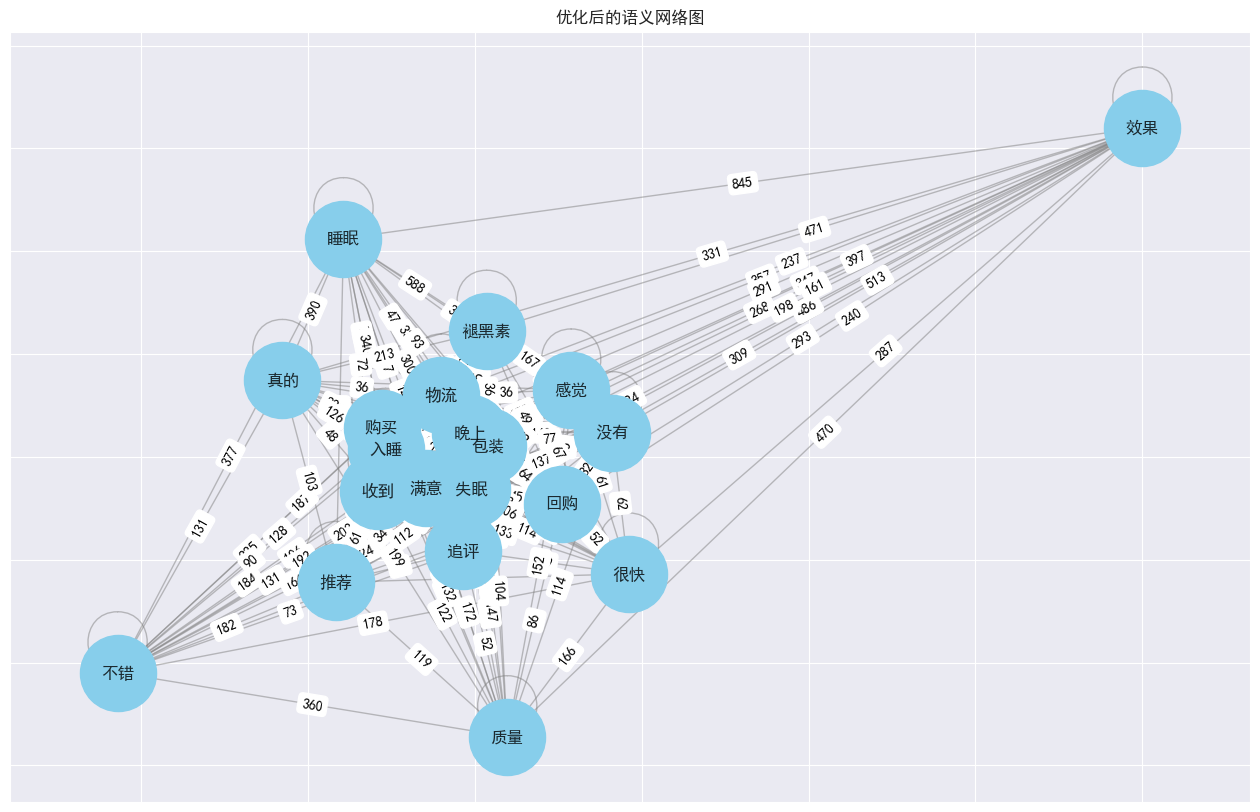

In [59]:
top_words = list(set(word for word, freq in word_freq.most_common(20)))
# 构建词汇共现矩阵
co_occurrence_matrix = pd.DataFrame(index=top_words, columns=top_words, data=0)

for tokens in data['tokens']:
    for i in range(len(tokens)):
        for j in range(i + 1, len(tokens)):
            if tokens[i] in top_words and tokens[j] in top_words:
                co_occurrence_matrix.loc[tokens[i], tokens[j]] += 1
                co_occurrence_matrix.loc[tokens[j], tokens[i]] += 1

G = nx.from_pandas_adjacency(co_occurrence_matrix)
plt.figure(figsize=(16, 10)) # 增大图像尺寸
pos = nx.kamada_kawai_layout(G) # 尝试不同的布局算法

# 绘制网络图
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue')
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')

# 自定义绘制节点标签
labels = nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
for _, node in labels.items():
    node.set_alpha(0.8) # 调整标签透明度

# 显示边的权重
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)

plt.title('优化后的语义网络图')
plt.savefig('优化后_语义网络图.png') # 保存图片
plt.show()


In [28]:
tqdm.pandas() # 启动进度条
data['sentiment'] = data['content'].progress_apply(
    lambda x:SnowNLP(x).sentiments if isinstance(x, str) else 0
)

100%|██████████| 7517/7517 [00:42<00:00, 176.42it/s]


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


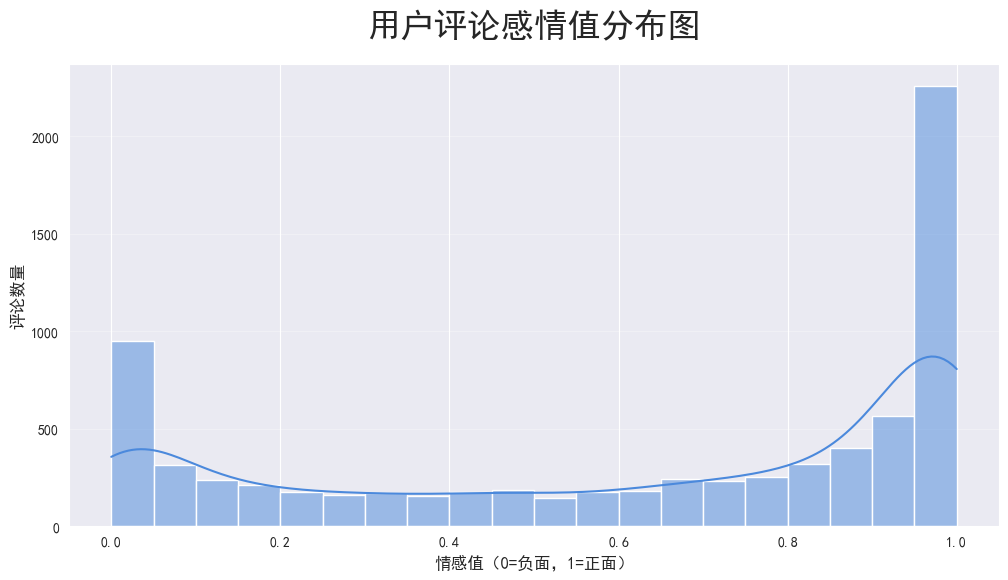

In [30]:
# 可视化
plt.figure(figsize=(12, 6))
sns.histplot(data['sentiment'], bins=20, kde=True, color='#4B89DC')
plt.title('用户评论感情值分布图', fontsize=24, pad=20)
plt.xlabel('情感值（0=负面，1=正面）', fontsize=12)
plt.ylabel('评论数量', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.savefig('情感分布.png', dpi=300, bbox_inches='tight')
plt.show()

In [41]:
# 3. 提取典型评论示例（新增单元格）
positive_samples = data[data['sentiment'] > 0.8].sample(4)[['content', 'sentiment']]
negative_samples = data[data['sentiment'] < 0.2].sample(6)[['content', 'sentiment']]

print("【典型正面评论】")
print(positive_samples.to_markdown(index=False))
print("\n【典型负面评论】")
print(negative_samples.to_markdown(index=False))

【典型正面评论】
| content                                                                                                                  |   sentiment |
|:-------------------------------------------------------------------------------------------------------------------------|------------:|
| 效果很好，还会回购的，发货也很快，满意                                                                                   |    0.98861  |
| 我失眠特别严重 但是吃安眠药又对自己身体有伤害 所以就抱着试试的心态买了这个褪黑素，吃完后十分钟就有了困意，对我特别有帮助 |    0.999971 |
| 这款褪黑素效果不错，性价比比较高，有长期失眠没有试过吃褪黑素的朋友们，值得你们一试！                                     |    0.999962 |
| 之前晚上一点睡意也没有，吃了这个褪黑素后过会就有困意了，睡的很好，醒来也精神，很久没有像现在睡的这么好了                 |    0.966597 |

【典型负面评论】
| content                                                                                                  |   sentiment |
|:---------------------------------------------------------------------------------------------------------|------------:|
| 不知道为啥 这次买的一点用都没有 还买的5mg的 我真服了 前段时间某东上买的3mg的都很有效果 同一个品牌        |   0.010